### **Coding the Positional Encoding Matrix from Scratch**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization,Embedding,Layer
from tensorflow.data import Dataset

$$PE_(pos,2i)= sin(\frac{pos}{10000^{\frac{2i}{d}}})$$
$$PE_(pos,2i+1)= cos(\frac{pos}{10000^{\frac{2i}{d}}})$$

$$PE_(pos,2i)= sin(\frac{k}{n^{\frac{2i}{d}}})$$
$$PE_(pos,2i+1)= cos(\frac{k}{n^{\frac{2i}{d}}})$$

In [2]:
# import matplotlib.image as mpimg
# image_path = "img/pos_encode1.png"
# image = mpimg.imread(image_path)
# plt.imshow(image)
# plt.show()

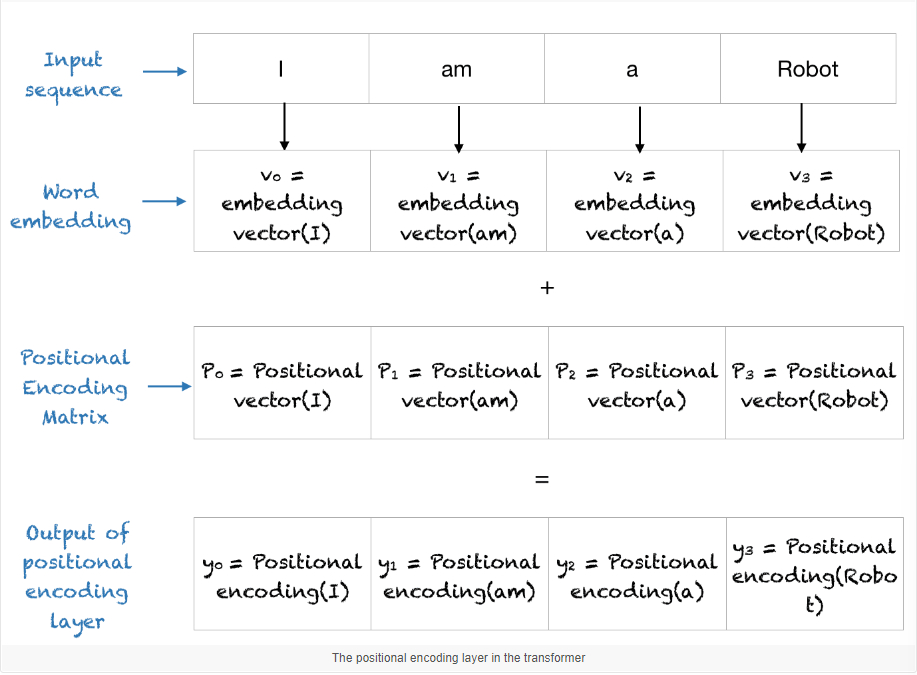

In [3]:
# https://stackoverflow.com/questions/45558282/pil-cant-save-the-jpg-pasted-with-a-png
img =Image.open("img/pos_encode1.PNG") # because it is a PNG file
img = img.convert('RGB')
img

In [4]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
np.arange(int(4/2))

array([0, 1])

In [6]:
range(4)

range(0, 4)

In [7]:
def get_positional_encoding(seq_len,d,n=10000):
    P = np.zeros((seq_len,d)) # a M x N zero matrix 
    for k in range(seq_len): # rows
        for i in np.arange(int(d/2)): # columns
            denominator = np.power(n,2*i/d)
            P[k,2*i] = np.sin(k/denominator) # gives matrix positions [0,0] and [0,2]
            P[k,(2*i)+1] = np.cos(k/denominator) # gives matrix positions [0,1] and [0,3]

    return P

In [8]:
P = get_positional_encoding(seq_len=4,d=4,n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


Text(0, 0.5, 'Position of Word')

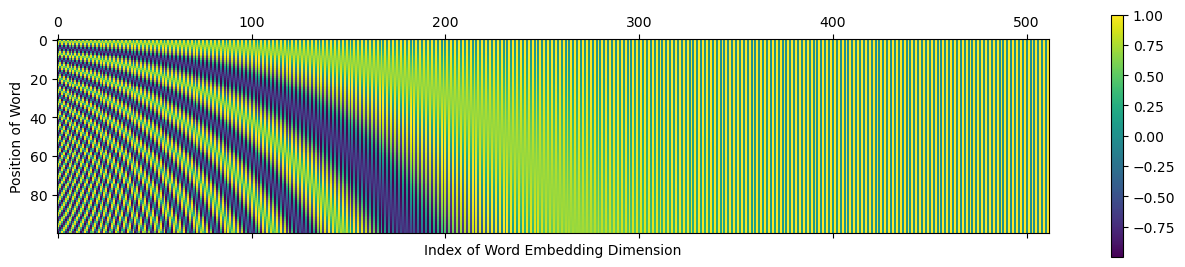

In [9]:
P = get_positional_encoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.xlabel("Index of Word Embedding Dimension")
plt.ylabel("Position of Word")

Text(0, 0.5, 'Position of Word')

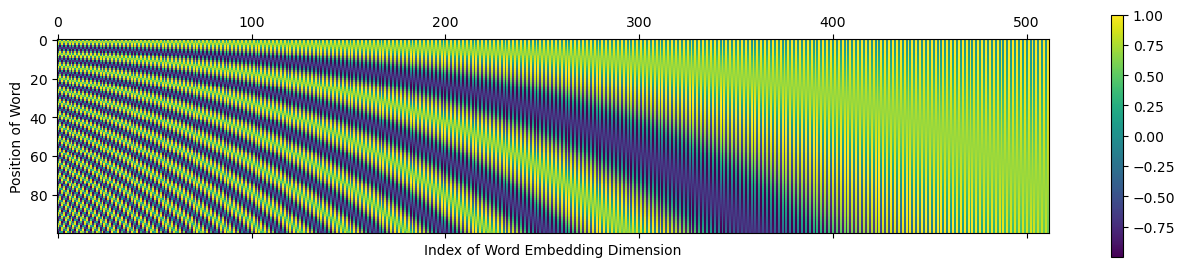

In [10]:
P = get_positional_encoding(seq_len=100, d=512, n=100)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.xlabel("Index of Word Embedding Dimension")
plt.ylabel("Position of Word")

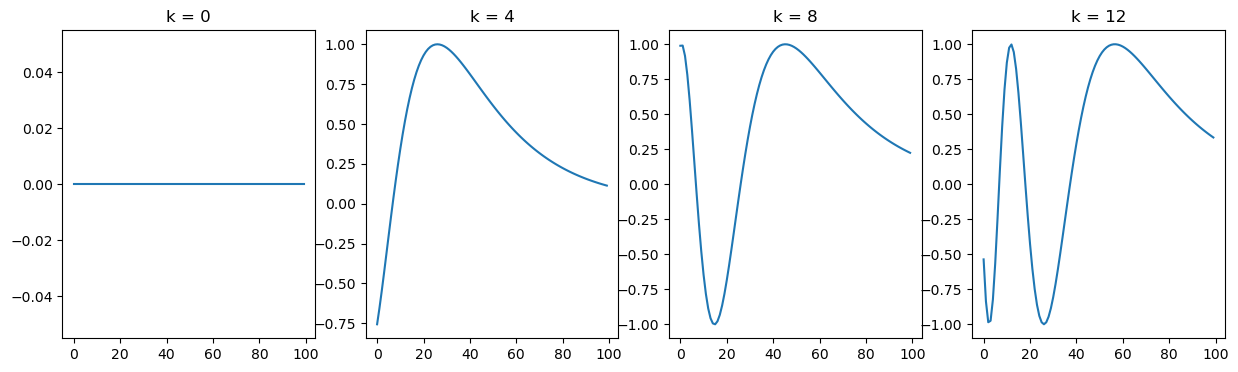

In [11]:
def plot_sinusoid(k,d=512,n=10000):
    x = np.arange(0,100,1)
    denominator = np.power(n,(2*x)/d)
    y = np.sin(k/denominator)
    plt.plot(x,y)
    plt.title(f"k = {k}")

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plot_sinusoid(i*4)

### **The Text Vectorization Layer**

In [12]:
tf.keras.backend.clear_session()
output_sequence_length = 5
vocab_size = 10
sentences = [["I am human"],["you too is a human"]]
sentences_data = Dataset.from_tensor_slices(sentences)
# Create TextVectorisation layer
vectorise_layer = TextVectorization(
    output_sequence_length=output_sequence_length,
    max_tokens=vocab_size
)
# Train the layer to create a dictionary
vectorise_layer.adapt(sentences_data)
word_tensors = convert_to_tensor(sentences,dtype=tf.string)

# Use the word tensors to get vectorised phrases
vectorise_words = vectorise_layer(word_tensors)
print(f"Vocabulary: {vectorise_layer.get_vocabulary()}")
print(f"Vectorised words:")
vectorise_words

# # The above code was commented to avoid errors due t running it multiple times
# # OUTPUT
# # Vocabulary: ['', '[UNK]', 'human', 'you', 'too', 'is', 'i', 'am', 'a']
# # Vectorised words:
# # <tf.Tensor: shape=(2, 5), dtype=int64, numpy=
# # array([[6, 7, 2, 0, 0],
# #        [3, 4, 5, 8, 2]], dtype=int64)>

Vocabulary: ['', '[UNK]', 'human', 'you', 'too', 'is', 'i', 'am', 'a']
Vectorised words:


<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[6, 7, 2, 0, 0],
       [3, 4, 5, 8, 2]], dtype=int64)>

### **The Embedding Layer**

In [13]:
output_length = 6
word_embedding_layer = Embedding(vocab_size,output_length)
embedded_words = word_embedding_layer(vectorise_words)
embedded_words # 2 sets having a 5 x 6 matrix, each word having its embedding matrix

<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[ 0.02843134,  0.00578021,  0.02425799, -0.01970118,
         -0.03083709,  0.00118644],
        [ 0.04735119,  0.04666051, -0.02323675, -0.00239886,
         -0.04228881,  0.02759996],
        [-0.04406636, -0.04491173,  0.01006415,  0.01439731,
          0.03107626,  0.03196902],
        [-0.00241163,  0.02967964, -0.03275769, -0.01717735,
          0.02814958, -0.04239772],
        [-0.00241163,  0.02967964, -0.03275769, -0.01717735,
          0.02814958, -0.04239772]],

       [[ 0.04046983, -0.03239026,  0.04505407, -0.04169661,
         -0.00651954, -0.02362039],
        [ 0.00114546,  0.03133568,  0.02582339, -0.01344762,
          0.000623  ,  0.01819969],
        [-0.03275031,  0.01801378, -0.01767892,  0.04957371,
          0.00449314,  0.00365491],
        [-0.00557879,  0.03802289, -0.04162792, -0.04769039,
          0.0178093 ,  0.03628341],
        [-0.04406636, -0.04491173,  0.01006415,  0.01439731,
          0.0

In [ ]:

# Text(0, 0.5, 'Position of Word')

# Vocabulary: ['', '[UNK]', 'human', 'you', 'too', 'is', 'i', 'am', 'a']
# Vectorised words:
# <tf.Tensor: shape=(2, 5), dtype=int64, numpy=
# array([[6, 7, 2, 0, 0],
#        [3, 4, 5, 8, 2]], dtype=int64)>
# <tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
# array([[[ 0.02843134,  0.00578021,  0.02425799, -0.01970118,
#          -0.03083709,  0.00118644], ---> I
#         [ 0.04735119,  0.04666051, -0.02323675, -0.00239886,
#          -0.04228881,  0.02759996], ---> am 
#         [-0.04406636, -0.04491173,  0.01006415,  0.01439731,
#           0.03107626,  0.03196902], ---> human
#         [-0.00241163,  0.02967964, -0.03275769, -0.01717735,
#           0.02814958, -0.04239772], ---> paddings
#         [-0.00241163,  0.02967964, -0.03275769, -0.01717735,
#           0.02814958, -0.04239772]], ---> paddings

#        [[ 0.04046983, -0.03239026,  0.04505407, -0.04169661,
#          -0.00651954, -0.02362039], ---> you 
#         [ 0.00114546,  0.03133568,  0.02582339, -0.01344762,
#           0.000623  ,  0.01819969], ---> too 
#         [-0.03275031,  0.01801378, -0.01767892,  0.04957371,
#           0.00449314,  0.00365491], ---> is 
#         [-0.00557879,  0.03802289, -0.04162792, -0.04769039,
#           0.0178093 ,  0.03628341], ---> a 
#         [-0.04406636, -0.04491173,  0.01006415,  0.01439731,
#           0.03107626,  0.03196902] ---> human
# ] 
# ], 
# dtype=float32)>

### **The Position Embeddings**

In [14]:
# making a 5x6 positional embedding matrix
position_embedding_layer = Embedding(output_sequence_length,output_length) # 5,6
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
embedded_indices

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[ 0.01235723,  0.01194249,  0.00058541,  0.00848589, -0.01882731,
         0.01604812],
       [-0.01505838,  0.01022012, -0.03919184,  0.03428929,  0.02348496,
        -0.01076448],
       [ 0.03427782,  0.04761923, -0.03936498, -0.00065912, -0.01308797,
         0.00644936],
       [-0.00854007,  0.00601208,  0.0013532 , -0.02250167, -0.00479304,
        -0.04443495],
       [-0.00968262,  0.01874138,  0.02815651, -0.01987516, -0.04377885,
         0.02694306]], dtype=float32)>

### **The Output of Positional Encoding Layer in Transformers**

In [15]:
final_output_embedding =  embedded_indices + embedded_words
print("Positional encoding + Input Embeddings")
final_output_embedding 
# Fo eacch word, its word embedding is added to the positional matrix
# a word is 5x6 and positional encoding is 5x6
# matrix addition is implemented

Positional encoding + Input Embeddings


<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[ 0.04078858,  0.0177227 ,  0.02484341, -0.01121529,
         -0.0496644 ,  0.01723456],
        [ 0.03229282,  0.05688063, -0.06242859,  0.03189043,
         -0.01880385,  0.01683548],
        [-0.00978854,  0.0027075 , -0.02930083,  0.01373819,
          0.01798829,  0.03841839],
        [-0.0109517 ,  0.03569173, -0.03140448, -0.03967903,
          0.02335654, -0.08683267],
        [-0.01209424,  0.04842103, -0.00460118, -0.03705251,
         -0.01562927, -0.01545465]],

       [[ 0.05282706, -0.02044776,  0.04563948, -0.03321072,
         -0.02534685, -0.00757227],
        [-0.01391292,  0.0415558 , -0.01336845,  0.02084167,
          0.02410796,  0.00743521],
        [ 0.00152751,  0.06563301, -0.0570439 ,  0.04891459,
         -0.00859483,  0.01010427],
        [-0.01411887,  0.04403497, -0.04027472, -0.07019206,
          0.01301626, -0.00815155],
        [-0.05374898, -0.02617035,  0.03822066, -0.00547785,
         -0.0

In [ ]:
# <tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
# array([[[ 0.04078858,  0.0177227 ,  0.02484341, -0.01121529,
#          -0.0496644 ,  0.01723456], ---> I
#         [ 0.03229282,  0.05688063, -0.06242859,  0.03189043,
#          -0.01880385,  0.01683548], ---> am 
#         [-0.00978854,  0.0027075 , -0.02930083,  0.01373819,
#           0.01798829,  0.03841839], ---> human
#         [-0.0109517 ,  0.03569173, -0.03140448, -0.03967903,
#           0.02335654, -0.08683267], ---> paddings
#         [-0.01209424,  0.04842103, -0.00460118, -0.03705251,
#          -0.01562927, -0.01545465]], ---> paddings

#        [[ 0.05282706, -0.02044776,  0.04563948, -0.03321072,
#          -0.02534685, -0.00757227], ---> you 
#         [-0.01391292,  0.0415558 , -0.01336845,  0.02084167,
#           0.02410796,  0.00743521], ---> too 
#         [ 0.00152751,  0.06563301, -0.0570439 ,  0.04891459,
#          -0.00859483,  0.01010427], ---> is 
#         [-0.01411887,  0.04403497, -0.04027472, -0.07019206,
#           0.01301626, -0.00815155],  ---> a 
#         [-0.05374898, -0.02617035,  0.03822066, -0.00547785,
#          -0.01270259,  0.05891208] ---> human
# ]
# ], dtype=float32)>

### **SubClassing the Keras Embedding Layer**

In [16]:
class PositionEmbeddingLayer(Layer):
    def __init__(self,sequence_length,vocab_size,output_dim, **kwargs):
        super(PositionEmbeddingLayer,self).__init__(**kwargs)
        self.word_embedding_layer = Embedding(input_dim=vocab_size,
        output_dim=output_dim
        )
        
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length,output_dim=output_dim
        )
    def call(self,inputs):
        position_indices = tf.range(tf.shape(inputs)[-1]) # make it a 1D
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_indices + embedded_words

In [17]:
my_embedding_layer = PositionEmbeddingLayer(output_sequence_length,
                            vocab_size,
                            output_length) # 5,10,6
embedded_output = my_embedding_layer(vectorise_words)
print("Output of my_embedding_layer")
embedded_output

Output of my_embedding_layer


<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[ 0.0152936 , -0.05102738,  0.07061514, -0.01742998,
         -0.01310352,  0.02512806],
        [ 0.03494027,  0.03532511, -0.08204937, -0.0478423 ,
          0.04555317,  0.02410627],
        [ 0.08982372, -0.02593887,  0.03892503,  0.01057514,
         -0.01064782, -0.00574487],
        [-0.0006329 ,  0.01502044, -0.01891879, -0.01875352,
          0.00910326, -0.03470794],
        [-0.00769792, -0.03560477, -0.06820623, -0.02108615,
         -0.01698153,  0.03047324]],

       [[ 0.03774734, -0.05670685,  0.05553575,  0.00999082,
          0.03433419, -0.00074084],
        [-0.04004271,  0.05699807, -0.0070648 , -0.0228522 ,
          0.03261516,  0.06459574],
        [ 0.03619253, -0.00735139,  0.09178586,  0.0454526 ,
         -0.06189756,  0.06782111],
        [ 0.04339489, -0.00999491,  0.01802056, -0.01667355,
         -0.05078751,  0.00843711],
        [ 0.08902984, -0.06779268, -0.05275389,  0.00218234,
         -0.0

### **Positional Encoding in Transformers: Attention Is All You Need**

In [23]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingFixedWeights, self).__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)   
        position_embedding_matrix = self.get_position_encoding(sequence_length, output_dim)                                          
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim,
            weights=[position_embedding_matrix],
            trainable=False
        )
             
    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [24]:
attention_encoding = PositionEmbeddingFixedWeights(output_sequence_length,
                            vocab_size,
                            output_length) # 5,10,6

attention_encoding_output = attention_encoding(vectorise_words)
print("Output of attention_encoding_output")
attention_encoding_output

Output of attention_encoding_output


<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[-0.2794155 ,  1.9601703 ,  0.27490926,  1.9614701 ,
          0.01292625,  1.9999164 ],
        [ 1.4984576 ,  1.2942045 ,  0.3656239 ,  1.9466021 ,
          0.0172349 ,  1.9998839 ],
        [ 1.8185948 , -0.8322937 ,  0.185397  ,  1.9913884 ,
          0.00861771,  1.9999814 ],
        [ 0.14112   ,  0.0100075 ,  0.1387981 ,  1.9903207 ,
          0.00646326,  1.9999791 ],
        [-0.7568025 ,  0.3463564 ,  0.18459873,  1.982814  ,
          0.00861763,  1.9999628 ]],

       [[ 0.14112   ,  0.0100075 ,  0.1387981 ,  1.9903207 ,
          0.00646326,  1.9999791 ],
        [ 0.08466846, -0.11334133,  0.23099795,  1.9817369 ,
          0.01077207,  1.9999605 ],
        [-0.04962689, -0.13248464,  0.3227002 ,  1.9688845 ,
          0.01508082,  1.9999328 ],
        [ 1.1304783 , -1.1354926 ,  0.5016505 ,  1.9221673 ,
          0.02369788,  1.9998306 ],
        [ 0.1524949 , -1.0697905 ,  0.27729723,  1.9785082 ,
          0.0

### **Visualizing the Final Embedding**

In [26]:
sentence1 ="Utilized the Tweepy API to extract valuable data from Twitter by scraping tweets, employing queries with hashtags, operators, and Booleans. Saved the collected data in CSV format."
sentence2 = "I regret to inform you that I am unable to come to work today. Please accept my sincere apologies for any inconvenience caused. Once again, I appreciate your understanding and support. Kind regards, Daniel C. Ihenacho"

In [28]:
tf.keras.backend.clear_session()
vocab_size = 200
sequence_length = 100 # max sequence length, input_sequence_length
final_output_size = 50  # embedding size of 50, remeber w2v vectors
phrase_vectorisation_layer = TextVectorization(
    output_sequence_length=sequence_length,
    max_tokens = vocab_size
)

# Train the layer to create a dictionary
phrase_vectorisation_layer.adapt([sentence1,sentence2])
phrase_tensors = convert_to_tensor([sentence1,sentence2],dtype=tf.string)

# Use the word tensors to get vectorised phrases
vectorise_phrases = phrase_vectorisation_layer(phrase_tensors)
print(f"Vocabulary: {phrase_vectorisation_layer.get_vocabulary()}")
print(f"Vectorised phrases:")
vectorise_phrases

Vocabulary: ['', '[UNK]', 'to', 'i', 'the', 'data', 'and', 'your', 'you', 'work', 'with', 'valuable', 'utilized', 'understanding', 'unable', 'twitter', 'tweets', 'tweepy', 'today', 'that', 'support', 'sincere', 'scraping', 'saved', 'regret', 'regards', 'queries', 'please', 'operators', 'once', 'my', 'kind', 'inform', 'inconvenience', 'in', 'ihenacho', 'hashtags', 'from', 'format', 'for', 'extract', 'employing', 'daniel', 'csv', 'come', 'collected', 'caused', 'c', 'by', 'booleans', 'appreciate', 'apologies', 'api', 'any', 'am', 'again', 'accept']
Vectorised phrases:


<tf.Tensor: shape=(2, 100), dtype=int64, numpy=
array([[12,  4, 17, 52,  2, 40, 11,  5, 37, 15, 48, 22, 16, 41, 26, 10,
        36, 28,  6, 49, 23,  4, 45,  5, 34, 43, 38,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 3, 24,  2, 32,  8, 19,  3, 54, 14,  2, 44,  2,  9, 18, 27, 56,
        30, 21, 51, 39, 53, 33, 46, 29, 55,  3, 50,  7, 13,  6, 20, 31,
        25, 42, 47, 35,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]], dtype=int64)>

In [29]:
tf.keras.backend.clear_session()
my_embedding_layer = PositionEmbeddingLayer(sequence_length,
                            vocab_size,
                            final_output_size) # 5,10,6
embedded_output = my_embedding_layer(vectorise_phrases)
print("Output of my_embedding_layer")
embedded_output

Output of my_embedding_layer


<tf.Tensor: shape=(2, 100, 50), dtype=float32, numpy=
array([[[ 0.04098064,  0.0719038 ,  0.08682044, ...,  0.05474354,
         -0.02154731,  0.06459774],
        [-0.03580437,  0.04514712, -0.00760299, ..., -0.04568111,
          0.00970712,  0.03313461],
        [-0.02786028,  0.02978385,  0.01129455, ..., -0.01957846,
          0.00230742,  0.00038314],
        ...,
        [-0.01817849,  0.00506121,  0.00776252, ...,  0.00062927,
          0.02221004, -0.0742562 ],
        [-0.06287824,  0.00113234,  0.02406946, ...,  0.02731124,
          0.00593634, -0.02612209],
        [ 0.02347629,  0.09089312,  0.06647725, ..., -0.00907197,
          0.03054653,  0.00121616]],

       [[ 0.01801523,  0.06180278,  0.04861148, ..., -0.01552274,
          0.02401409,  0.03933799],
        [-0.02922807,  0.04170626,  0.05493711, ..., -0.01195481,
          0.07129949,  0.0372761 ],
        [ 0.00447194,  0.08509135, -0.02032986, ..., -0.00272506,
         -0.06457072,  0.01082732],
        ...,


In [30]:
tf.keras.backend.clear_session()
attention_encoding = PositionEmbeddingFixedWeights(sequence_length,
                            vocab_size,
                            final_output_size) # 5,10,6

attention_encoding_output = attention_encoding(vectorise_phrases)
print("Output of attention_encoding_output")
attention_encoding_output

Output of attention_encoding_output


<tf.Tensor: shape=(2, 100, 50), dtype=float32, numpy=
array([[[-5.3657293e-01,  1.8438540e+00,  9.0131956e-01, ...,
          1.9999969e+00,  1.7345268e-03,  1.9999986e+00],
        [ 8.4668458e-02, -1.1334133e-01,  1.0035403e+00, ...,
          1.9999996e+00,  7.2271982e-04,  1.9999998e+00],
        [-5.2100062e-02, -6.9131017e-01,  2.6154155e-01, ...,
          1.9999936e+00,  2.7463331e-03,  1.9999969e+00],
        ...,
        [ 3.7960774e-01,  7.4852467e-02, -9.0617859e-01, ...,
          1.9997947e+00,  1.4020306e-02,  1.9999018e+00],
        [-5.7338190e-01,  1.8071175e-01, -9.6761459e-01, ...,
          1.9997904e+00,  1.4164836e-02,  1.9998996e+00],
        [-9.9920684e-01,  1.0398209e+00, -5.8410120e-01, ...,
          1.9997861e+00,  1.4309365e-02,  1.9998976e+00]],

       [[ 1.4112000e-01,  1.0007501e-02,  8.7532121e-01, ...,
          1.9999998e+00,  4.3363191e-04,  1.9999999e+00],
        [-6.4107418e-02,  9.6448129e-01, -1.4287353e-01, ...,
          1.9999874e+00,  3.6

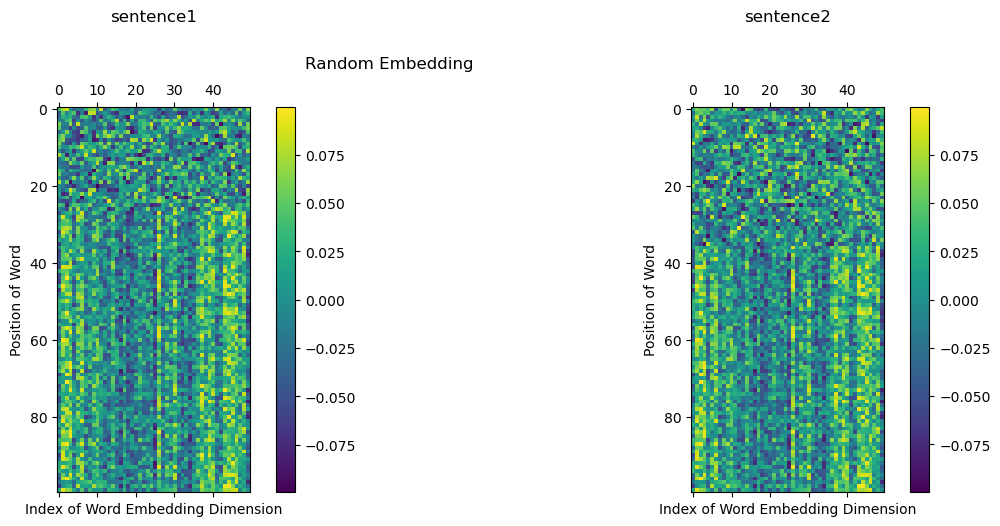

In [33]:
fig = plt.figure(figsize=(15, 5))    
title = ["sentence1", "sentence2"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(embedded_output[i, :, :], (sequence_length, final_output_size))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
    plt.xlabel("Index of Word Embedding Dimension")
    plt.ylabel("Position of Word")
fig.suptitle("Random Embedding")
plt.show()

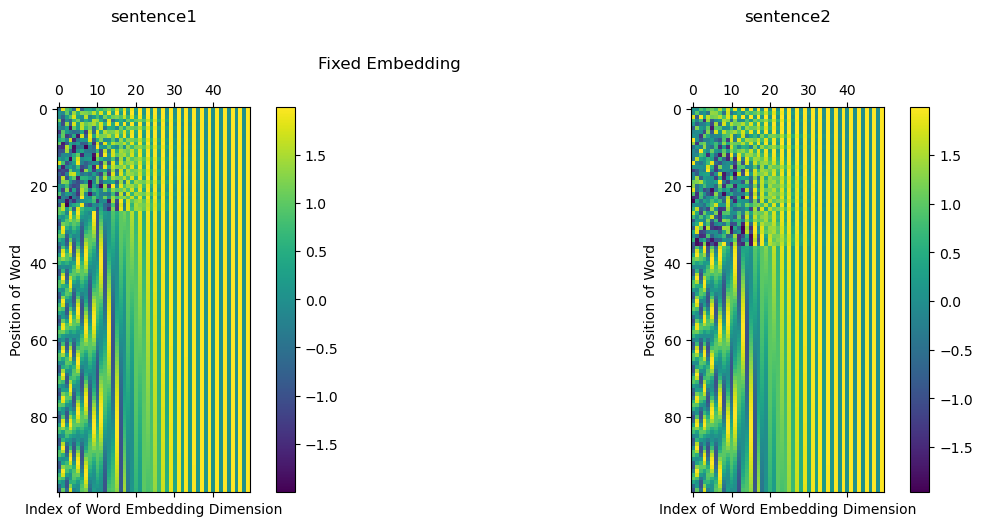

In [35]:
fig = plt.figure(figsize=(15, 5))    
title = ["sentence1", "sentence2"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(attention_encoding_output[i, :, :], (sequence_length, final_output_size))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
    plt.xlabel("Index of Word Embedding Dimension")
    plt.ylabel("Position of Word")
fig.suptitle("Fixed Embedding")
plt.show()